In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [196]:
!conda info


     active environment : base
    active env location : C:\Users\shfar\anaconda3
            shell level : 1
       user config file : C:\Users\shfar\.condarc
 populated config files : C:\Users\shfar\.condarc
          conda version : 4.10.3
    conda-build version : 3.21.4
         python version : 3.8.8.final.0
       virtual packages : __win=0=0
                          __archspec=1=x86_64
       base environment : C:\Users\shfar\anaconda3  (writable)
      conda av data dir : C:\Users\shfar\anaconda3\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/noarch
          package cache : C:\Users\s

In [191]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [108]:
# set configuration
nr_moments = 6

# classificatio
test_size = 0.2
cv = 5
cv_config = [test_size, cv]

In [144]:
data = pd.read_csv('graphwave_ac_data.csv')
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,1611,1612,1613,1614,1615,1616,1617,1618,1619,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B5_0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B5_0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B5_0


In [145]:
data['label'].unique()

array(['B5_0', 'B5_1', 'B5_2', 'B5_3', 'B5_4', 'C8_0', 'C8_1', 'C8_2',
       'C8_3', 'D5_0', 'D5_1', 'DB55_0', 'DB55_1', 'DS5_1', 'DS5_0',
       'H5_0', 'H5_1', 'H5_2', 'L5_0', 'L5_1', 'L5_2', 'L5_3', 'L5_4',
       'L5_5', 'L5_6', 'PB5_0', 'PB5_1', 'PB5_2', 'S5_0', 'S5_1', 'U5_0',
       'U5_1', 'U5_2', 'U5_3', 'U5_4', 'W5_0', 'W5_1', 'W5_2', 'W5_3'],
      dtype=object)

In [42]:
data = df.loc[df['label']=='B5_0']

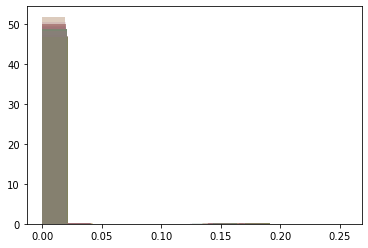

In [46]:
labels = data['label'].unique()

for i in labels:
    fig, ax = plt.subplots()
    sample = data.loc[data['label'] == i]
    
    for index, row in sample.iterrows():
        x = row[:-1]
        plt.hist(x, density=True, histtype='stepfilled', bins='auto', alpha=0.1)
        
    #plt.legend()
    plt.show()

In [167]:
moments_df = dem.get_moments_df(data,nr_moments)
moments_df.head(3)

,m1,m2,m3,m4,m5,m6,label
0,0.000678,0.000095,0.000017,0.000003,6.645604e-07,1.449269e-07,B5_0
1,0.000601,0.000093,0.000017,0.000003,6.699010e-07,1.428403e-07,B5_0
2,0.000601,0.000093,0.000017,0.000003,6.699010e-07,1.428403e-07,B5_0


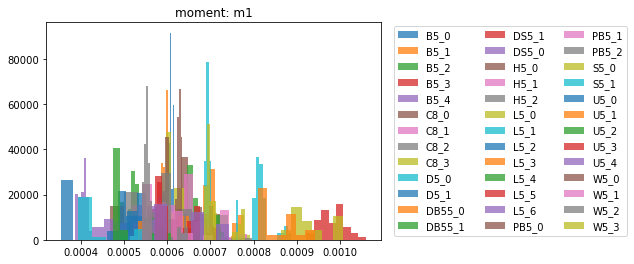

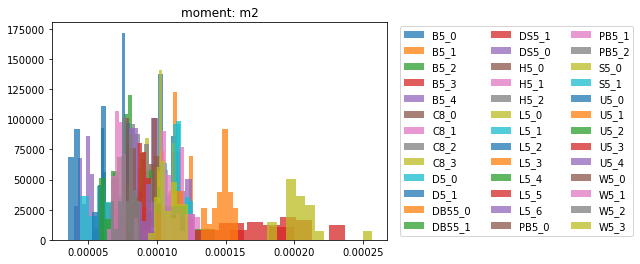

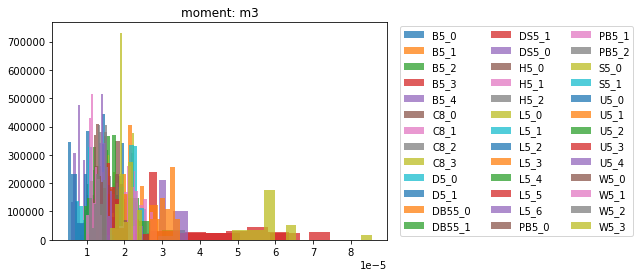

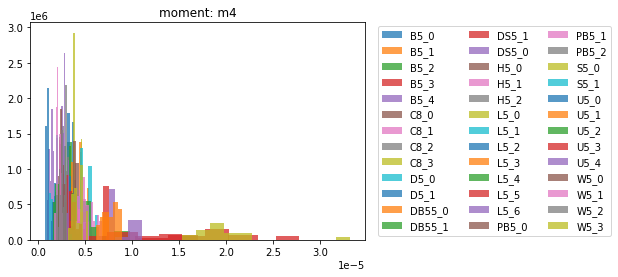

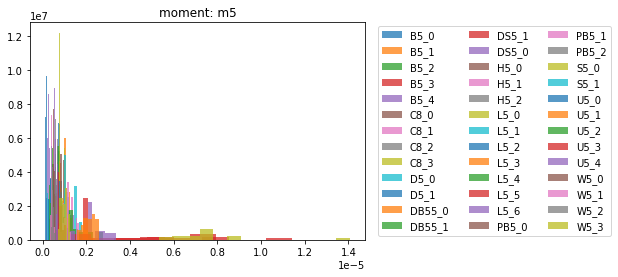

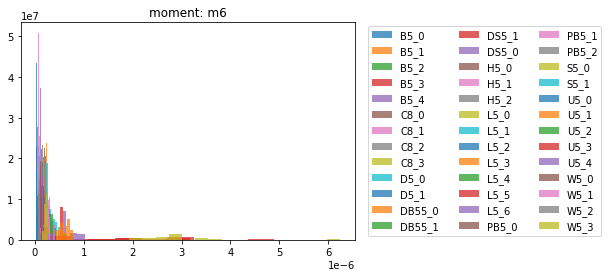

In [168]:
get_histogram_of_moments(moments_df)

In [175]:
score = cm.rr_model(moments_df, 0.2, 5, plot=0)
np.mean(score)

0.27044652447445144

In [176]:
score = cm.svm_model(moments_df, test_size, cv, plot=0)
np.mean(score)

0.7984757812899596

In [ ]:
moments_df = dem.get_moments_df(data,nr_moments)
score = cm.svm_model(moments_df, test_size, cv, plot=0)
np.mean(score)

  0%|          | 0/29 [00:00<?, ?it/s]

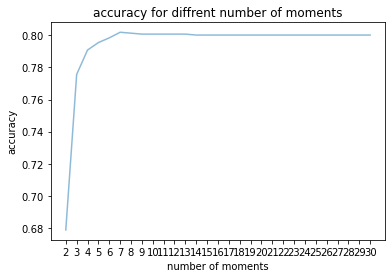

[0.6787206110514381,
 0.7756824032871293,
 0.7908819668218164,
 0.7955552145670298,
 0.7984757812899596,
 0.8019828482771555,
 0.8013997578981467,
 0.8008149625765093,
 0.8008149625765093,
 0.8008149625765093,
 0.8008149625765093,
 0.8008149625765093,
 0.8002318721975005,
 0.8002318721975005,
 0.8002318721975005,
 0.8002318721975005,
 0.8002318721975005,
 0.8002318721975005,
 0.8002318721975005,
 0.8002318721975005,
 0.8002318721975005,
 0.8002318721975005,
 0.8002318721975005,
 0.8002318721975005,
 0.8002318721975005,
 0.8002318721975005,
 0.8002318721975005,
 0.8002318721975005,
 0.8002318721975005]

In [193]:
nr_moments_list = list(range(2,31))
cm.cv_moments(nr_moments_list, data, cv_config, 1)

### Bounded distributions

In [4]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [6]:
moments_df = dem.get_moments_df(bounded_samples, nr_moments)
moments_df.head(3)

,m1,m2,m3,m4,m5,m6,dist
0,0.482645,0.114165,0.003148,0.020997,0.001203,0.004389,arcsine
1,0.458979,0.116094,0.001410,0.020918,0.001041,0.004205,arcsine
2,0.516576,0.133172,-0.000506,0.025223,-0.000697,0.005299,arcsine


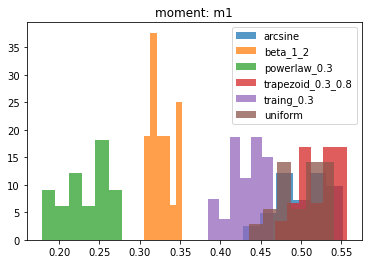

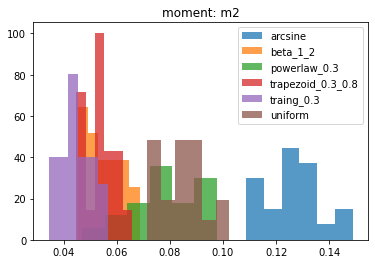

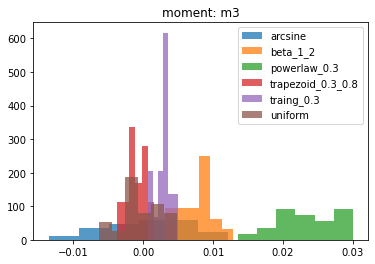

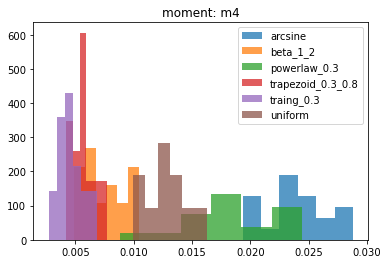

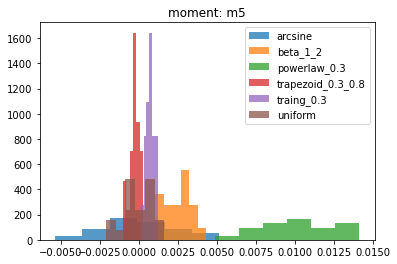

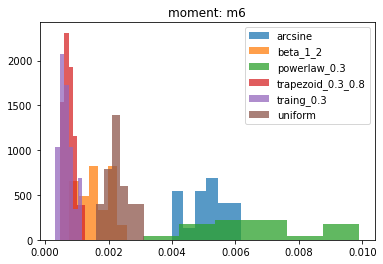

In [7]:
dem.get_histogram_of_moments(moments_df)

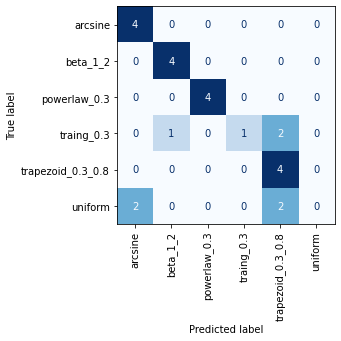

array([0.9       , 0.73684211, 0.68421053, 0.73684211, 0.89473684])

In [11]:
cm.rr_model(moments_df, 0.2, 5, plot=1)

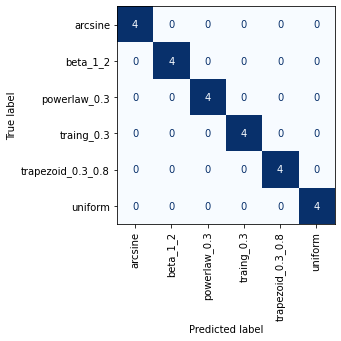

array([1.        , 1.        , 1.        , 0.94736842, 1.        ])

In [12]:
cm.svm_model(moments_df, test_size, cv, plot=1)

for loop for sample size:   0%|          | 0/9 [00:00<?, ?it/s]

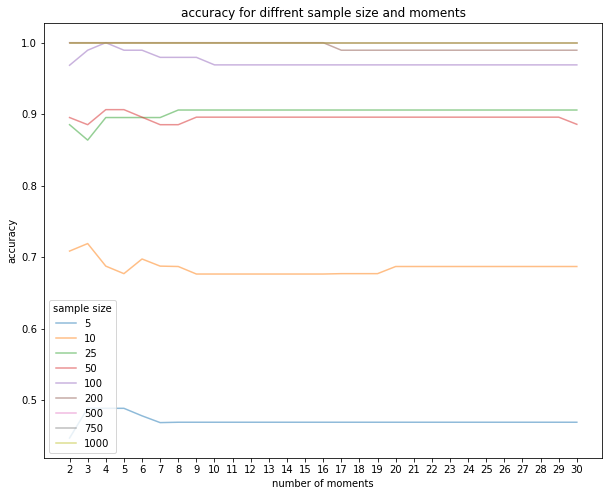

In [20]:
sample_size_list = [5, 10, 25, 50, 100, 200, 500, 750, 1000]
nr_moments_list = list(range(2,31))
acc = cm.cv_moments_sample_size(sample_size_list, nr_moments_list, bounded_dists, 20, cv_config, 1)

% completed:   0%|          | 0/9 [00:00<?, ?it/s]

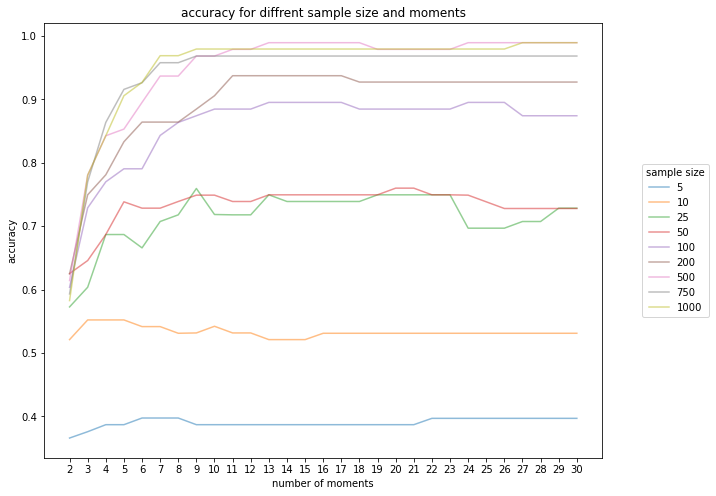

In [23]:
acc = cm.cv_moments_sample_size(sample_size_list, nr_moments_list, bounded_dists, 20, cv_config, 2)

### Heavytail distributions

In [14]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(heavytail_samples)

In [104]:
moments_df = dem.get_moments_df(heavytail_samples, nr_moments)
moments_df.head()

,m1,m2,m3,m4,m5,m6,dist
0,2.779658,6.421961e+01,5.452421e+03,6.362051e+05,8.039403e+07,1.042470e+10,cauchy
1,5.607938,8.720941e+02,2.990430e+05,1.195444e+08,5.059714e+10,2.209249e+13,cauchy
2,3.745959,1.512678e+02,1.866896e+04,3.112581e+06,5.694318e+08,1.079513e+11,cauchy
3,132.579376,7.789537e+06,4.840328e+11,3.016346e+16,1.879722e+21,1.171403e+26,cauchy
4,4.825650,9.782384e+02,5.157588e+05,3.112724e+08,1.930869e+11,1.206007e+14,cauchy


In [105]:
transformed_sampels = dict()
for name, samples in heavytail_samples.items():
    transformed_sampels[name] = np.log1p(samples)
    
moments_df = dem.get_moments_df(transformed_sampels, nr_moments)
moments_df.head()

,m1,m2,m3,m4,m5,m6,dist
0,0.876862,0.559737,0.685496,2.072027,5.649270,17.900205,cauchy
1,0.935783,0.840612,1.687084,6.720574,26.717583,116.583803,cauchy
2,0.943585,0.711344,1.041983,3.381649,10.178257,34.739602,cauchy
3,0.965178,0.987189,3.619379,28.084757,245.103487,2304.865109,cauchy
4,0.864410,0.732931,1.500664,5.888309,23.960615,108.690952,cauchy


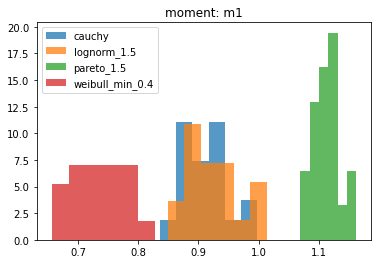

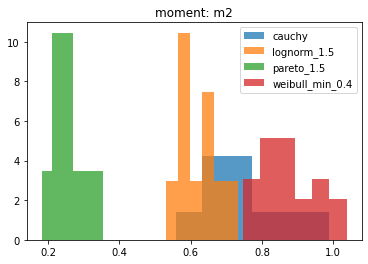

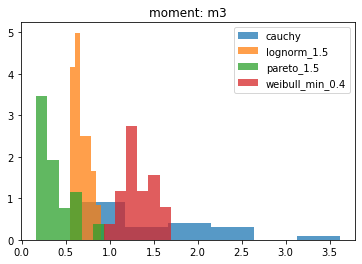

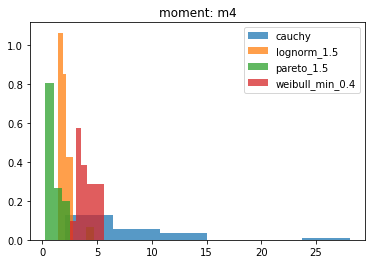

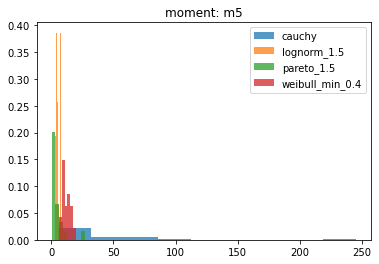

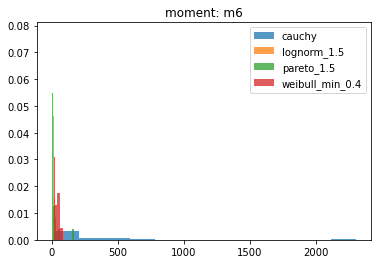

In [106]:
dem.get_histogram_of_moments(moments_df)

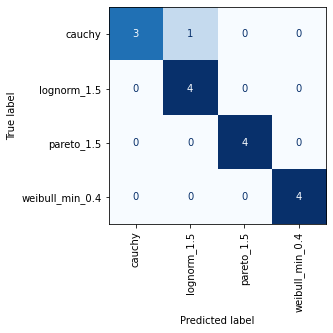

array([0.92307692, 0.92307692, 1.        , 1.        , 1.        ])

In [107]:
cm.svm_model(moments_df, test_size, cv, plot=1)

In [95]:
sample_size_list = [5, 10, 25, 50, 100, 150, 200, 500, 750, 1000]
nr_moments_list = list(range(2,31))
acc = cv_moments_sample_size_ht(sample_size_list, nr_moments_list, heavytail_dists)

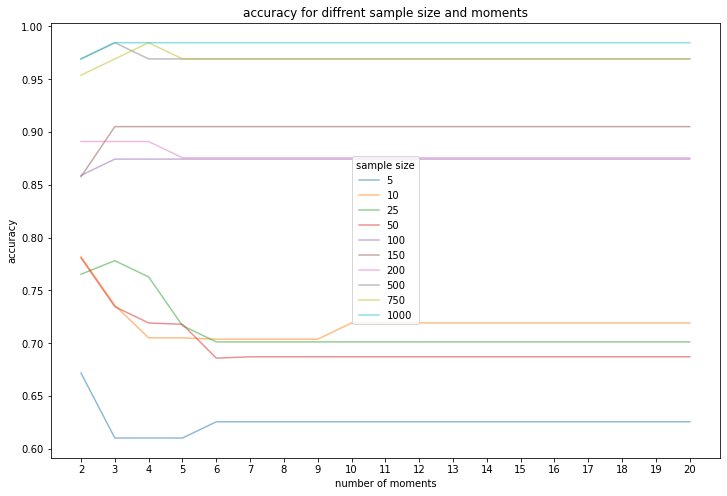

In [96]:
plt.figure(figsize=(12, 8))
for i in range(len(acc)):
    plt.plot(nr_moments_list, acc[i], label=str(sample_size_list[i]), alpha = 0.5)
    plt.title('accuracy for diffrent sample size and moments')
    plt.xlabel('number of moments')
    plt.ylabel('accuracy')
    plt.legend(title='sample size')
    plt.xticks(np.arange(min(nr_moments_list), max(nr_moments_list)+1, 1.0))
plt.show()

In [92]:
def cv_moments_sample_size_ht(sample_size_list, nr_moments_list, dists):
    acc = list()
    for i in sample_size_list:
        samples = dm.get_samples(dists, nr_sample, i)
        tr_sampels = dict()
        for name, sample in samples.items():
            tr_sampels[name] = np.log1p(sample)
        acc_ = [] 

        for j in nr_moments_list:
            df = dem.get_moments_df(tr_sampels, j)
            score = cm.svm_model(df, test_size, cv)
            acc_.append(score.mean())

        acc.append(acc_)
    return acc